In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
#전처리
df_selected = df[{"Survived", "Pclass", "Sex", "Age", "Parch", "SibSp", "Fare", "Embarked"}].dropna()

df_selected["Sex_number"] = df_selected["Sex"].replace("female", 1).replace("male", 2)
df_selected["Embarked_number"] = df_selected["Embarked"].replace("C", 1).replace("Q", 2).replace("S", 3)
display(df_selected)
# sns.pairplot(df_selected)

,Fare,Sex,Embarked,SibSp,Age,Survived,Pclass,Parch,Sex_number,Embarked_number
0,7.2500,male,S,1,22.0,0,3,0,2,3
1,71.2833,female,C,1,38.0,1,1,0,1,1
2,7.9250,female,S,0,26.0,1,3,0,1,3
3,53.1000,female,S,1,35.0,1,1,0,1,3
4,8.0500,male,S,0,35.0,0,3,0,2,3
...,...,...,...,...,...,...,...,...,...,...
885,29.1250,female,Q,0,39.0,0,3,5,1,2
886,13.0000,male,S,0,27.0,0,2,0,2,3
887,30.0000,female,S,0,19.0,1,1,0,1,3
889,30.0000,male,C,0,26.0,1,1,0,2,1


In [20]:
#데이터셋 분리
x = df_selected[{"Pclass", "Sex_number", "Age", "Parch", "SibSp", "Fare", "Embarked_number"}]
y = df_selected["Survived"]
# display(x)
# display(y)

,Embarked_number,Fare,SibSp,Age,Pclass,Parch,Sex_number
0,0.519223,-0.516017,0.522144,-0.527298,0.907961,-0.506431,0.755606
1,-2.048047,0.693558,0.522144,0.576688,-1.481941,-0.506431,-1.321582
2,0.519223,-0.503267,-0.552325,-0.251301,0.907961,-0.506431,-1.321582
3,0.519223,0.350080,0.522144,0.369691,-1.481941,-0.506431,-1.321582
4,0.519223,-0.500905,-0.552325,0.369691,0.907961,-0.506431,0.755606
...,...,...,...,...,...,...,...
885,-0.764412,-0.102803,-0.552325,0.645688,0.907961,5.347126,-1.321582
886,0.519223,-0.407401,-0.552325,-0.182302,-0.286990,-0.506431,0.755606
887,0.519223,-0.086274,-0.552325,-0.734295,-1.481941,-0.506431,-1.321582
889,-2.048047,-0.086274,-0.552325,-0.251301,-1.481941,-0.506431,0.755606


<AxesSubplot:>

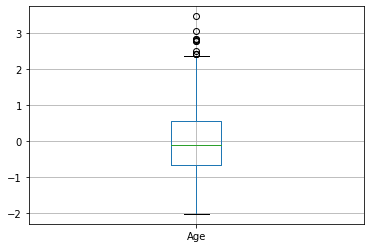

In [25]:
x = (x - x.mean())/x.std() #normalize
display(x)
x.boxplot(column="Age")

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=34)

display(x_train)
display(y_train)

,Embarked_number,Fare,SibSp,Age,Pclass,Parch,Sex_number
434,0.519223,0.402971,0.522144,1.404678,-1.481941,-0.506431,0.755606
426,0.519223,-0.161834,0.522144,-0.113303,-0.286990,-0.506431,-1.321582
190,0.519223,-0.407401,-0.552325,0.162694,-0.286990,-0.506431,-1.321582
199,0.519223,-0.407401,-0.552325,-0.389300,-0.286990,-0.506431,-1.321582
4,0.519223,-0.500905,-0.552325,0.369691,0.907961,-0.506431,0.755606
...,...,...,...,...,...,...,...
403,0.519223,-0.353565,0.522144,-0.113303,0.907961,-0.506431,0.755606
111,-2.048047,-0.379931,0.522144,-1.044791,0.907961,-0.506431,-1.321582
622,-2.048047,-0.355611,0.522144,-0.665296,0.907961,0.664280,0.755606
152,0.519223,-0.500905,-0.552325,1.784174,0.907961,-0.506431,0.755606


434    0
426    1
190    1
199    0
4      0
      ..
403    0
111    0
622    1
152    0
526    1
Name: Survived, Length: 605, dtype: int64

In [27]:
ml = SVC(kernel="linear", C=1.0, random_state=0)
ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)
print("SVM 총 테스트 갯수 : %d, 오류 갯수 : %d" %(len(y_test), (y_test != y_pred).sum()))
print("SVM 정확도 %.2f" %accuracy_score(y_test, y_pred))

SVM 총 테스트 갯수 : 107, 오류 갯수 : 23
SVM 정확도 0.79


In [28]:
clf = LogisticRegression(solver='lbfgs').fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Logistic 총 테스트 갯수 : %d, 오류 갯수 : %d" %(len(y_test), (y_test != y_pred).sum()))
print("Logistic 정확도 %.2f" %accuracy_score(y_test, y_pred))

Logistic 총 테스트 갯수 : 107, 오류 갯수 : 19
Logistic 정확도 0.82
